# Multitouch Attribution Modeling (EDA)

## 1. Goal of the project

The goal of this multi-touch attribution modelling is to understand the impact of each touchpoint in the customer journey with various digital online channels.

## 2. Overview data
This notebook analyses the data retrieved from [Kaggle](https://www.kaggle.com/datasets/vivekparasharr/multi-touch-attribution/data). 

The dataset contains 10,000 rows of marketing interaction data, designed to support multi-touch attribution (MTA) analysis. It records user interactions with various marketing channels and campaigns over a two-day period (February 10-11, 2025), along with conversion outcomes.

Columns of the dataset:

| Column name | Description |
| --- | ----------- |
| User ID | A unique identifier for each customer.|
| Timestamp | The exact date and time of the interaction.|
| Channel | The marketing channel where the interaction occurred.|
| Campaign | The specific marketing campaign associated with the interaction. ‘-’ indicates no campaign.|
| Conversion | Indicates whether the user converted (Yes) or not (No). |

Key Insights:  
• Unique Users: 2,847  
• Most Frequent Channel: Direct Traffic (~17.2%)  
• Campaign Involvement: 31.3% of interactions had no campaign assigned.  
• Conversion Rate: 49.44% of interactions resulted in a conversion.  

In [6]:
# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from marketing_attribution_models import *

In [8]:
# read in csv file and display first 5 rows of the datset
df = pd.read_csv("c:/Users/Maria/Desktop/ds_projects/attribution/data/raw/multi_touch_attribution_data.csv")
df.head()

,User ID,Timestamp,Channel,Campaign,Conversion
0,83281,2025-02-10 07:58:51,Email,New Product Launch,No
1,68071,2025-02-10 23:38:48,Search Ads,Winter Sale,No
2,90131,2025-02-11 10:41:07,Social Media,Brand Awareness,Yes
3,71026,2025-02-10 08:19:44,Direct Traffic,-,Yes
4,94486,2025-02-10 15:15:46,Email,Retargeting,Yes


In [10]:
# Shape of the dataset
df.shape

(10000, 5)

In [11]:
# Check out our data-types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User ID     10000 non-null  int64 
 1   Timestamp   10000 non-null  object
 2   Channel     10000 non-null  object
 3   Campaign    10000 non-null  object
 4   Conversion  10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


In [13]:
# Changing the type of the column Timestamp to a datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [15]:
# Changing the column Conversion to a Boolean format
df['Conversion'] = df['Conversion'].map({'Yes': 1, 'No': 0})

In [17]:
# Renaming the columns:
df = df.rename(columns={
    'User ID': 'customer_id',
    'Timestamp': 'event_date',
    'Channel': 'channel_name',
    'Campaign': 'campaign',
    'Conversion': 'conversion'
})

In [18]:
# Checking for missing values
df.isnull().sum()

customer_id     0
event_date      0
channel_name    0
campaign        0
conversion      0
dtype: int64

In [19]:
# Checking the number of unique user ids in the whole dataset:
unique_uids=df['customer_id'].unique()
print(f"There are {len(unique_uids)} unique user ids in the dataset.")

There are 2847 unique user ids in the dataset.


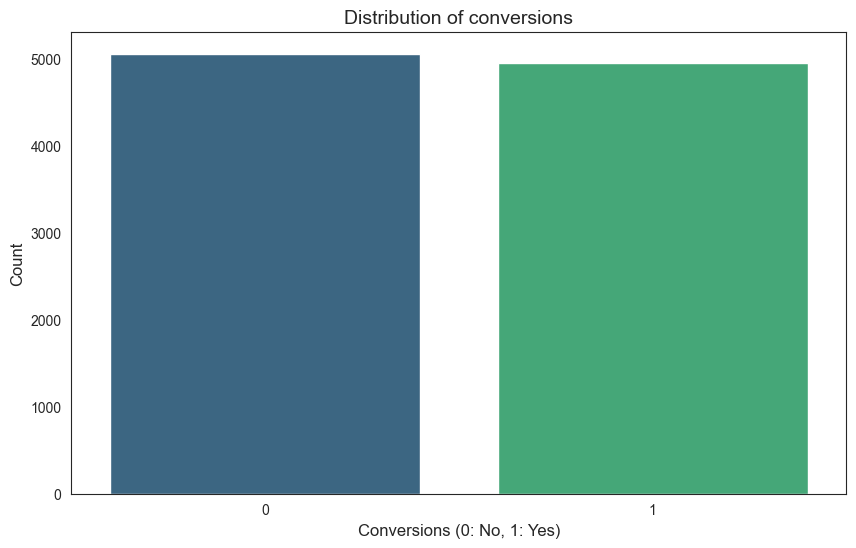

In [23]:
conversion_counts = df['conversion'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=conversion_counts.index, y=conversion_counts.values, palette="viridis")
plt.title("Distribution of conversions", fontsize=14)
plt.xlabel("Conversions (0: No, 1: Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

For the modeling, it is important to have at least two contacts in order to evaluate different attribution models. So, we analyze the data with regards to the chain length within the customer journey that led to a conversion.

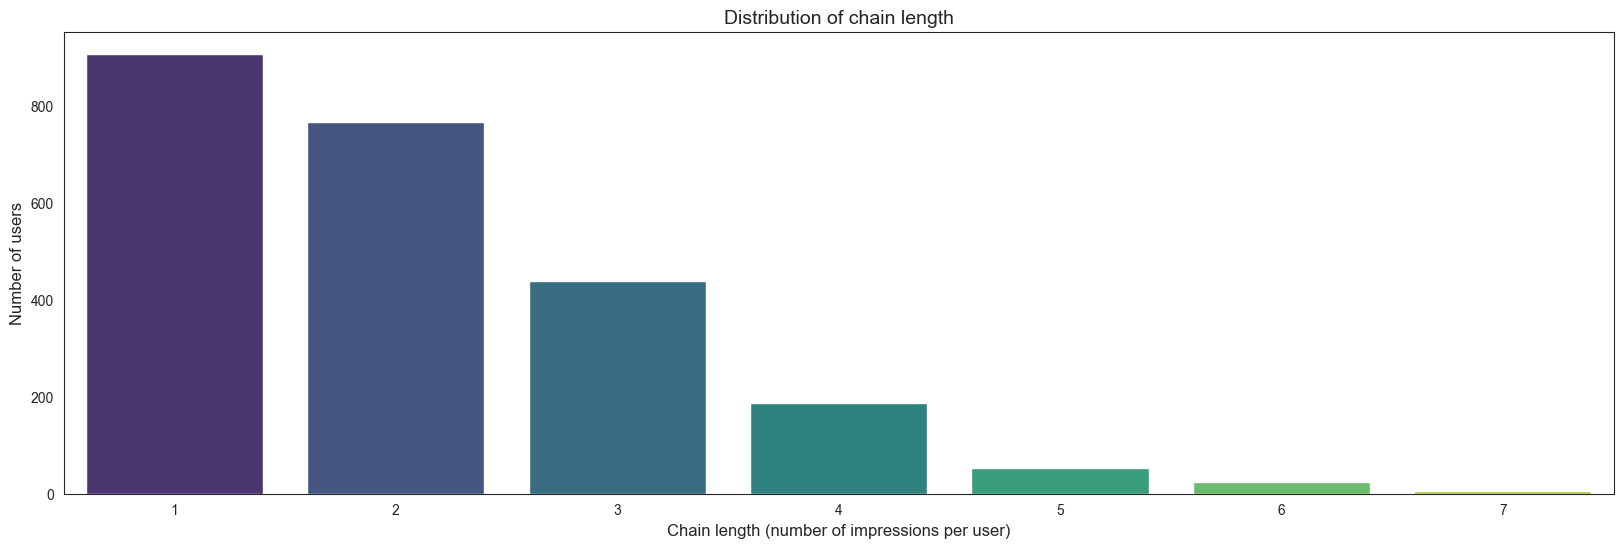

In [ ]:
df_conversions = df[df['conversion']==1].copy()

chain_lengths = df_conversions['customer_id'].value_counts()
length_distribution = chain_lengths.value_counts().sort_index()

plt.figure(figsize=(20,6))
sns.barplot(x = length_distribution.index, y = length_distribution.values, palette="viridis")

plt.title("Distribution of chain length resulting in conversions", fontsize = 14)
plt.xlabel("Chain length (number of impressions per user)", fontsize = 12)
plt.ylabel("Number of users", fontsize = 12)

plt.show()

The graph shows, that most of the chains have only one contact, so we are reducing the dataset to those customer journeys which had a conversion and at least two impressions in the chain.

## 6. Creating a DataFrame for the DP6 Attribution Package

With the help of the DP6 attribution package, we can use simple heuristic models as a starting point.

The data frame has to contain the following columns: user_id, event_date (timestamp of contact), channel and conversion.

## 7. Saving the subset of the data as csv

In [ ]:
df_subset.to_csv('c:/Users/Maria/Desktop/ds_projects/attribution/data/processed/pcb_subset.csv', index=False)